# 🙌 Add Region of Interest (ROIs) for Comparitive Analysis

Frequently, adding Regions of Interest (ROIs) to an image is crucial for conducting comparative analysis, such as identifying distinct histological sites, tumor regions, or boundaries. To incorporate ROIs into scimap, there are two approaches:

1. Directly drawing on the image using napari.
2. For images stored on OMERO, ROIs can be added, exported, and then imported into scimap.

In [1]:
# import packages
import scimap as sm
import anndata as ad

Running SCIMAP  1.3.14


In [2]:
# Load the data that we saved in the last tutorial (cell phenotyping)
adata = ad.read_h5ad('/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData/scimapExampleData.h5ad')

### 1. Add ROIs via Napari

When you open napari, a new layer named "ROI" is automatically added by default. To create Regions of Interest, select the "Add Polygons" tool and draw your desired ROIs, which can include multiple polygons. You also have the option to rename this layer to something more specific, such as "Tumor Regions." For different classes of ROIs, like stromal regions, simply create a new layer and repeat the process.

**It's important to note that ROIs should not overlap, since each cell can only be assigned to one unique ROI.**

To save the ROIs, simply close the napari window.

In [3]:
%gui qt
image_path = '/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData/registration/exemplar-001.ome.tif'

In [4]:
adata = sm.pl.addROI_image(image_path, adata)


        Opening Napari;
        Add shape layers (on left) to draw ROI's. 
        Rename the shape layer to give a name to your ROI
        Multiple shape layers are supported
        ROI's should not overlap
        Close Napari to save ROI's.
        
Identifying cells within selected ROI's
ROIs saved under adata.obs['ROI']


I've created three layers, "ROI1", "ROI2" and "ROI3" with each layer containing several designated areas.

In [5]:
# print the number of cells within the assigned ROIs
adata.obs['ROI'].value_counts()

ROI
Other    9132
ROI3     1513
ROI2      497
ROI1       59
Name: count, dtype: int64

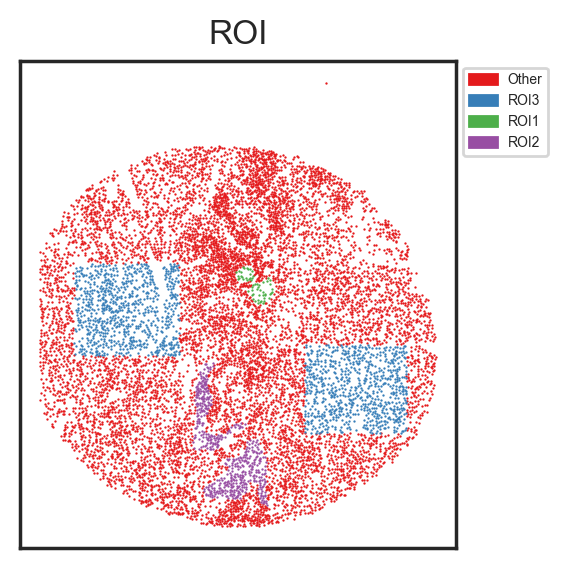

In [6]:
# check the added ROIs
sm.pl.spatial_scatterPlot (adata, colorBy = ['ROI'],figsize=(3,3), s=0.7, fontsize=5, catCmap='Set1')

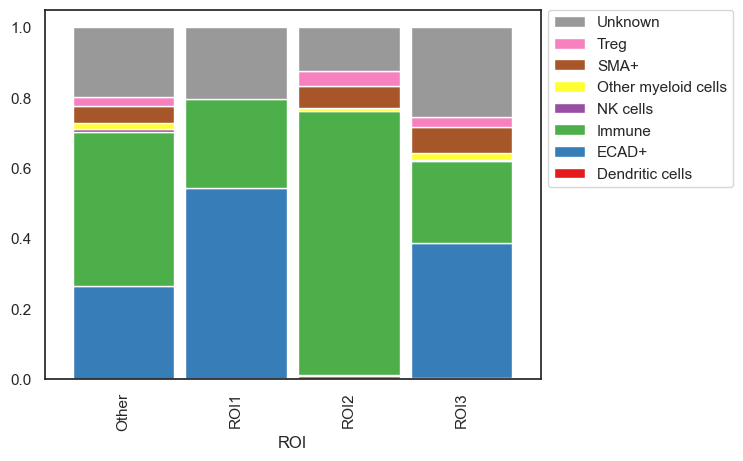

In [7]:
# We can now do any downstream analysis for example let's look at the distribution of cell types within these ROIs
sm.pl.stacked_barplot (adata, x_axis='ROI', y_axis='phenotype')

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/plotting/groupCorrelation.py:127: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



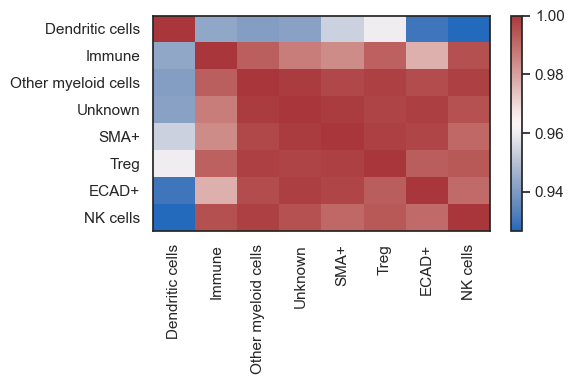

In [12]:
# or look at the correaltion of cell types between ROIs
sm.pl.groupCorrelation(adata, groupBy='phenotype', condition='ROI', figsize=(6,4))

### 2. Add ROIs via Omero

`sm.hl.add_roi_omero` function seamlessly integrates Regions of Interest ( ROIs) extracted from Omero into AnnData object.

The function allows users to add annotations that have been extracted from Omero using the following **[script](https://gist.github.com/Yu-AnChen/58754f960ccd540e307ed991bc6901b0)**

The script will download a CSV file. The same conditions apply as before. No ROI should overlap. 

```python
roi_df = pd.read_csv('path/to/roi.csv')

# Add ROIs to a single image dataset
adata = sm.hl.addROI_omero(adata, roi=roi_df, label='Omero_ROI')
```

### Save Results

In [13]:
# Save the results
adata.write('/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData/scimapExampleData.h5ad')